### Import Module

In [334]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Read The First 5 Data

In [335]:
df = pd.read_csv("dataset_for_ML.csv")
df.head()

,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,Months,Days,Hours,Minutes
0,271.64,SBI Bank,HDFC Bank,5557.02,Delhi,Female,Transfer,Success,Tablet,Phone Number,Amazon,Food,21,Scheduled,USD,2,2,17,12
1,1064.63,ICICI Bank,SBI Bank,9753.32,Bangalore,Male,Payment,Success,Laptop,QR Code,Zomato,Travel,22,Instant,EUR,3,3,11,15
2,144.15,Axis Bank,Axis Bank,7597.35,Hyderabad,Female,Transfer,Success,Mobile,UPI ID,Swiggy,Bill Payment,23,Scheduled,GBP,4,4,21,29
3,612.89,HDFC Bank,ICICI Bank,2327.84,Mumbai,Male,Payment,Success,Tablet,Phone Number,IRCTC,Others,24,Instant,INR,5,5,6,27
4,743.32,SBI Bank,HDFC Bank,1136.84,Delhi,Female,Transfer,Failed,Laptop,QR Code,Flipkart,Shopping,25,Scheduled,USD,6,6,2,6


### Drop Columns That Cause Data Leakege

In [336]:
df = df.drop(columns=["MerchantName", "Days", "Months", "Hours", "Minutes"])

In [337]:
df.head()

,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,DeviceType,PaymentMethod,Purpose,CustomerAge,PaymentMode,Currency
0,271.64,SBI Bank,HDFC Bank,5557.02,Delhi,Female,Transfer,Success,Tablet,Phone Number,Food,21,Scheduled,USD
1,1064.63,ICICI Bank,SBI Bank,9753.32,Bangalore,Male,Payment,Success,Laptop,QR Code,Travel,22,Instant,EUR
2,144.15,Axis Bank,Axis Bank,7597.35,Hyderabad,Female,Transfer,Success,Mobile,UPI ID,Bill Payment,23,Scheduled,GBP
3,612.89,HDFC Bank,ICICI Bank,2327.84,Mumbai,Male,Payment,Success,Tablet,Phone Number,Others,24,Instant,INR
4,743.32,SBI Bank,HDFC Bank,1136.84,Delhi,Female,Transfer,Failed,Laptop,QR Code,Shopping,25,Scheduled,USD


### Split data into X and y

In [338]:
X = df.drop(columns="Purpose")
y = df["Purpose"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Train Size : {X_train.shape}")
print(f"Test Size : {X_test.shape}")

Train Size : (14000, 13)
Test Size : (6000, 13)


### Encoding

One Hot Encoding(OHE)

In [339]:
cols = [
    "BankNameSent", 
    "BankNameReceived", 
    "City", 
    "Gender", 
    "TransactionType", 
    "Status", 
    "DeviceType", 
    "PaymentMethod", 
    "PaymentMode", 
    "Currency"
]

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_ohe = pd.DataFrame(
    data=ohe.fit_transform(X_train[cols]),
    index=X_train.index,
    columns=ohe.get_feature_names_out(cols)
)
X_test_ohe = pd.DataFrame(
    data=ohe.transform(X_test[cols]),
    index=X_test.index,
    columns=ohe.get_feature_names_out(cols)
)

X_train = pd.concat([X_train.drop(columns=cols), X_train_ohe], axis=1)
X_test = pd.concat([X_test.drop(columns=cols), X_test_ohe], axis=1)

print(f"X_train After Encoding : {X_train.shape}")
print(f"X_test After Encoding : {X_test.shape}")

X_train After Encoding : (14000, 33)
X_test After Encoding : (6000, 33)


In [340]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

### Based Model

In [341]:
rfc_based = RandomForestClassifier()
rfc_based.fit(X_train, y_train)
print(f"Accuracy Score X_train of based_model : {rfc_based.score(X_train, y_train):0.2f}")

Accuracy Score X_train of based_model : 1.00


In [342]:
y_pred_based_model = rfc_based.predict(X_test)
print(f"Accuracy Score X_test of based_model : {accuracy_score(y_test, y_pred_based_model):0.2f}")

Accuracy Score X_test of based_model : 0.99


### Hyperparameter Tunning

In [343]:
param_grid = {
    'n_estimators': [100, 120, 200],
    'max_depth': [10, 12, 15, None],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfc_based, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameter: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\Farzah\Documents\Data_Analyst\UPI Transcations\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameter: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.9877859131548775


### Check Model With Best Params

In [344]:
best_model.fit(X_train, y_train)
print(f"Accuracy Score X_train of Best Model : {best_model.score(X_train, y_train)}")

y_pred_best_model = best_model.predict(X_test)
print(f"Accuracy Score X_test of Best Model : {accuracy_score(y_test, y_pred_best_model)}")

Accuracy Score X_train of Best Model : 1.0
Accuracy Score X_test of Best Model : 0.995


C:\Users\Farzah\AppData\Local\Temp\ipykernel_9264\1868595871.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_features.values, y=top_5_features.index, palette='viridis')


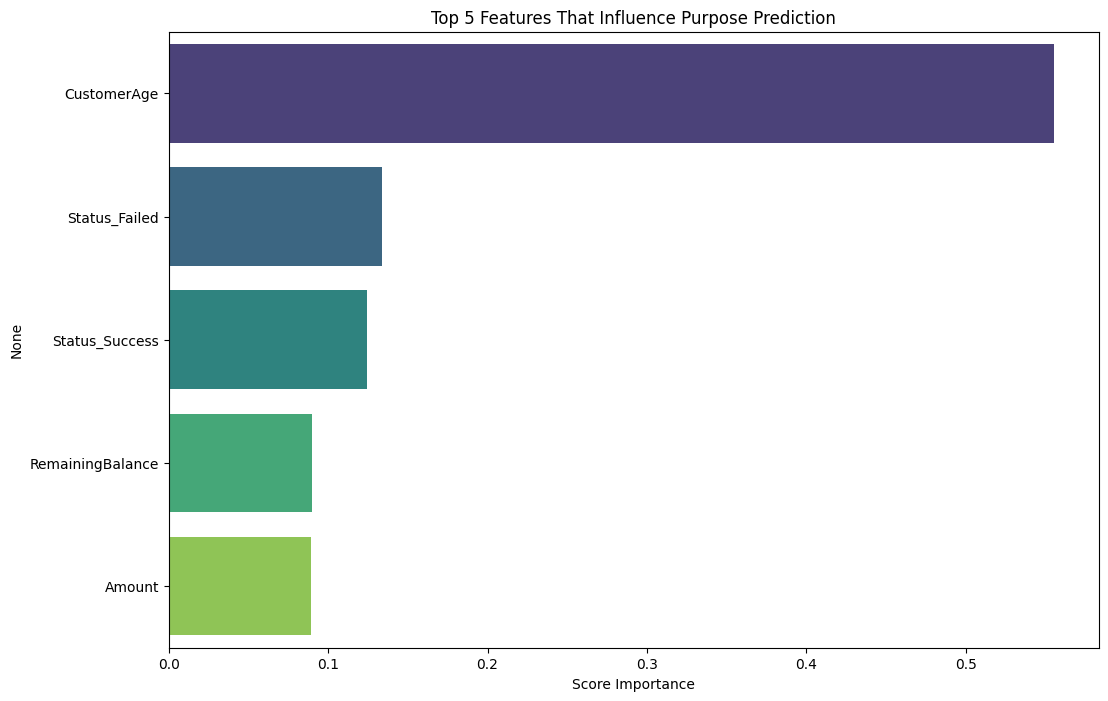

In [345]:
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
top_5_features = feature_importances.nlargest(5)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_features.values, y=top_5_features.index, palette='viridis')
plt.title('Top 5 Features That Influence Purpose Prediction')
plt.xlabel('Score Importance')
plt.show()

### Evaluation Model

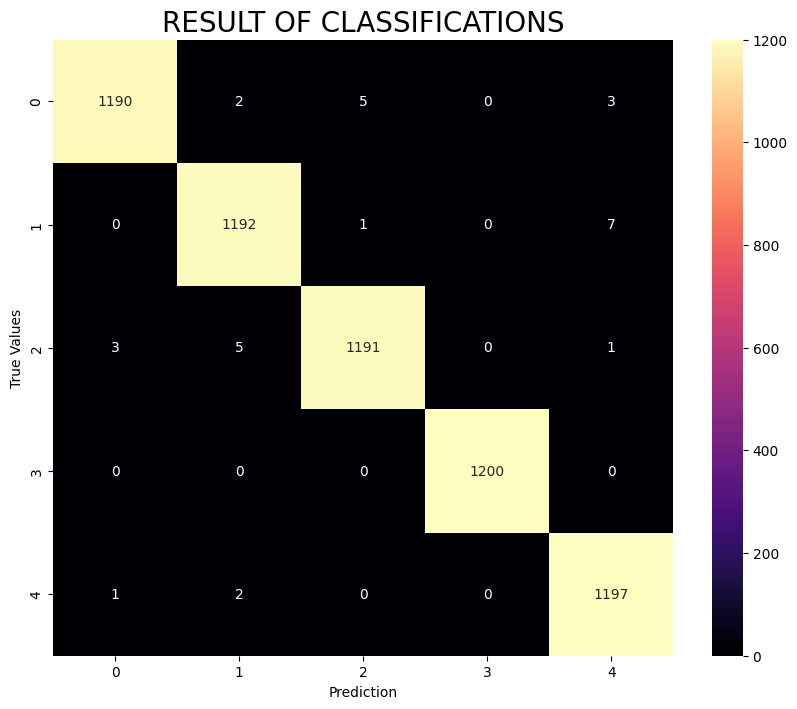


Classification Matrix :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1200
           1       0.99      0.99      0.99      1200
           2       0.99      0.99      0.99      1200
           3       1.00      1.00      1.00      1200
           4       0.99      1.00      0.99      1200

    accuracy                           0.99      6000
   macro avg       1.00      0.99      0.99      6000
weighted avg       1.00      0.99      0.99      6000



In [346]:
# Evaluation Model
matrix = confusion_matrix(y_test, y_pred_best_model.reshape(-1))

plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="magma")
plt.xlabel("Prediction")
plt.ylabel("True Values")
plt.title("Result of Classifications".upper(), fontsize=20)
plt.show()

report = classification_report(y_test, y_pred_best_model)
print(f"\nClassification Matrix :\n{report}")